In [56]:
import pandas as pd
bjhands = pd.read_csv('~/Downloads/blackjack/blkjckhands.csv')
bjhands.head(20)

,Unnamed: 0,PlayerNo,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,...,dealcard4,dealcard5,sumofdeal,blkjck,winloss,plybustbeat,dlbustbeat,plwinamt,dlwinamt,ply2cardsum
0,0,Player1,7,10,0,0,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,17
1,1,Player2,10,9,0,0,0,19,10,8,...,0,0,18,nowin,Win,Plwin,Beat,20,0,19
2,2,Player3,9,8,0,0,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,17
3,3,Player4,2,10,0,5,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,12
4,4,Player5,10,2,0,5,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,12
5,5,Player6,6,1,8,10,0,25,10,8,...,0,0,18,nowin,Loss,Bust,PlBust,0,10,7
6,0,Player1,10,4,0,0,0,14,4,4,...,10,0,23,nowin,Win,DlBust,Bust,20,0,14
7,1,Player2,3,10,0,0,0,13,4,4,...,10,0,23,nowin,Win,DlBust,Bust,20,0,13
8,2,Player3,10,2,0,0,0,12,4,4,...,10,0,23,nowin,Win,DlBust,Bust,20,0,12
9,3,Player4,9,6,0,0,0,15,4,4,...,10,0,23,nowin,Win,DlBust,Bust,20,0,15


In [57]:
bjhands.drop(bjhands.columns[0], axis=1, inplace=True)
nRow, nCol = bjhands.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 900000 rows and 20 columns


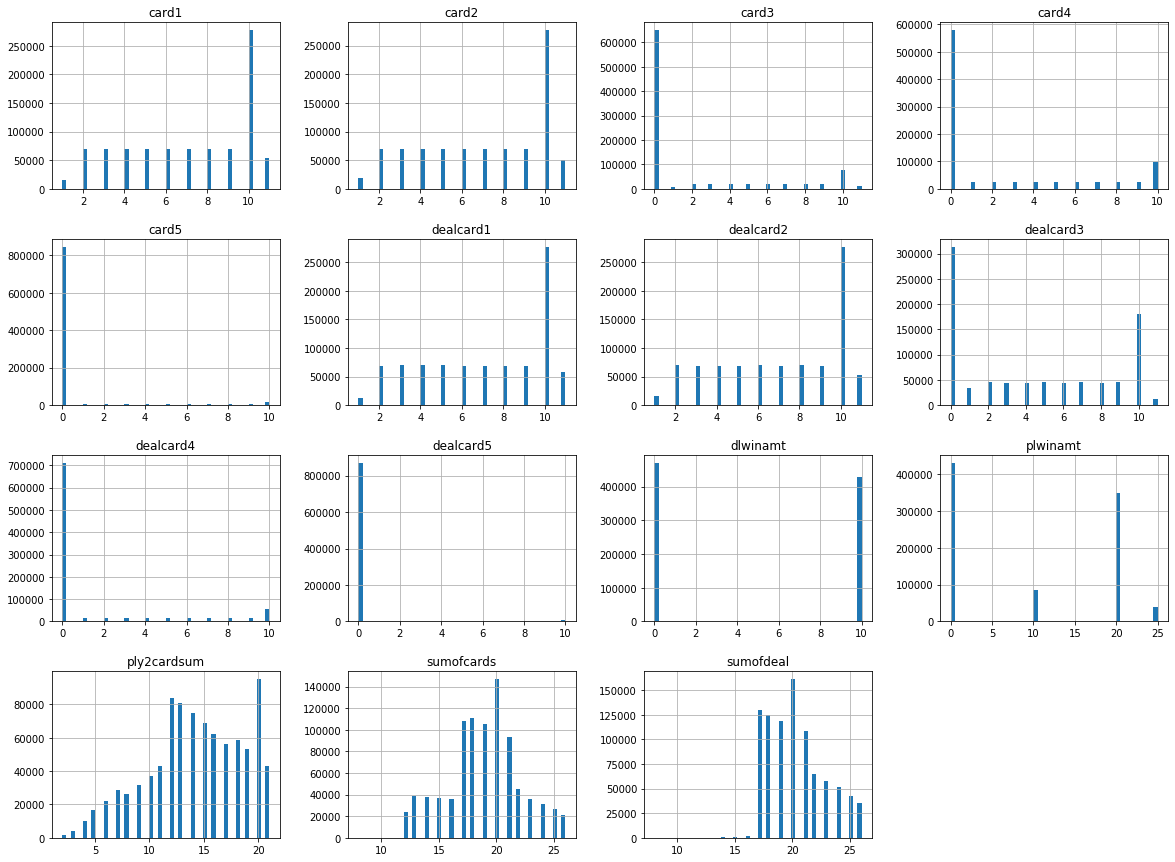

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

bjhands.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
#correlation matrix?
#plot scatter matrix?

In [59]:
#only keep need column
df = bjhands[['card1', 'card2', 'sumofcards', 'dealcard1', 'winloss']]
df

,card1,card2,sumofcards,dealcard1,winloss
0,7,10,17,10,Loss
1,10,9,19,10,Win
2,9,8,17,10,Loss
3,2,10,17,10,Loss
4,10,2,17,10,Loss
...,...,...,...,...,...
899995,10,7,17,3,Loss
899996,6,1,17,3,Loss
899997,4,2,15,3,Loss
899998,9,10,19,3,Win


In [3]:
df['player_total_initial'] = df['card1'] + df['card2']
df

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,card1,card2,sumofcards,dealcard1,winloss,player_total_initial
0,7,10,17,10,Loss,17
1,10,9,19,10,Win,19
2,9,8,17,10,Loss,17
3,2,10,17,10,Loss,12
4,10,2,17,10,Loss,12
...,...,...,...,...,...,...
899995,10,7,17,3,Loss,17
899996,6,1,17,3,Loss,7
899997,4,2,15,3,Loss,6
899998,9,10,19,3,Win,19


In [5]:
# if player_total_initial == sumofcards hit = 1, else hit = 0
df['hit'] = df.apply(lambda x : 0 if x['player_total_initial'] == x['sumofcards'] else 1, axis=1)
df

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,card1,card2,sumofcards,dealcard1,winloss,player_total_initial,hit
0,7,10,17,10,Loss,17,0
1,10,9,19,10,Win,19,0
2,9,8,17,10,Loss,17,0
3,2,10,17,10,Loss,12,1
4,10,2,17,10,Loss,12,1
...,...,...,...,...,...,...,...
899995,10,7,17,3,Loss,17,0
899996,6,1,17,3,Loss,7,1
899997,4,2,15,3,Loss,6,1
899998,9,10,19,3,Win,19,0


In [6]:
df['winloss'].unique()

array(['Loss', 'Win', 'Push'], dtype=object)

In [8]:
# Y: win 1, push 0, nowin -1
df['Y'] = df.apply(lambda x : -1 if x['winloss'] == 'Loss' else (1 if x['winloss'] == 'Win' else 0), axis=1)
df

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,card1,card2,sumofcards,dealcard1,winloss,player_total_initial,hit,Y
0,7,10,17,10,Loss,17,0,-1
1,10,9,19,10,Win,19,0,1
2,9,8,17,10,Loss,17,0,-1
3,2,10,17,10,Loss,12,1,-1
4,10,2,17,10,Loss,12,1,-1
...,...,...,...,...,...,...,...,...
899995,10,7,17,3,Loss,17,0,-1
899996,6,1,17,3,Loss,7,1,-1
899997,4,2,15,3,Loss,6,1,-1
899998,9,10,19,3,Win,19,0,1


In [9]:
#has_ace: card1 == 1 or card1 == 11 or card2 == 1 or card2 == 11?
df['has_ace'] = df.apply(lambda x : 1 if x['card1'] == 1 or x['card1'] == 11 or x['card2'] == 1 or x['card2'] == 11 else 0, axis=1)
df

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,card1,card2,sumofcards,dealcard1,winloss,player_total_initial,hit,Y,has_ace
0,7,10,17,10,Loss,17,0,-1,0
1,10,9,19,10,Win,19,0,1,0
2,9,8,17,10,Loss,17,0,-1,0
3,2,10,17,10,Loss,12,1,-1,0
4,10,2,17,10,Loss,12,1,-1,0
...,...,...,...,...,...,...,...,...,...
899995,10,7,17,3,Loss,17,0,-1,0
899996,6,1,17,3,Loss,7,1,-1,1
899997,4,2,15,3,Loss,6,1,-1,0
899998,9,10,19,3,Win,19,0,1,0


In [11]:

df['lose'] = df.apply(lambda x : 1 if x['Y'] == -1 else 0, axis=1)
df

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,card1,card2,sumofcards,dealcard1,winloss,player_total_initial,hit,Y,has_ace,lose
0,7,10,17,10,Loss,17,0,-1,0,1
1,10,9,19,10,Win,19,0,1,0,0
2,9,8,17,10,Loss,17,0,-1,0,1
3,2,10,17,10,Loss,12,1,-1,0,1
4,10,2,17,10,Loss,12,1,-1,0,1
...,...,...,...,...,...,...,...,...,...,...
899995,10,7,17,3,Loss,17,0,-1,0,1
899996,6,1,17,3,Loss,7,1,-1,1,1
899997,4,2,15,3,Loss,6,1,-1,0,1
899998,9,10,19,3,Win,19,0,1,0,0


In [13]:
# correct_hit: if lose == 1     if hit -> not hit, not hit->hit
# else: if lose == 0 hit->hit, not hit-> not hit
df['correct_hit'] = df.apply(lambda x : 1 - x['hit'] if x['lose'] == 1 else x['lose'], axis=1)
df

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,card1,card2,sumofcards,dealcard1,winloss,player_total_initial,hit,Y,has_ace,lose,correct_hit
0,7,10,17,10,Loss,17,0,-1,0,1,1
1,10,9,19,10,Win,19,0,1,0,0,0
2,9,8,17,10,Loss,17,0,-1,0,1,1
3,2,10,17,10,Loss,12,1,-1,0,1,0
4,10,2,17,10,Loss,12,1,-1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
899995,10,7,17,3,Loss,17,0,-1,0,1,1
899996,6,1,17,3,Loss,7,1,-1,1,1,0
899997,4,2,15,3,Loss,6,1,-1,0,1,0
899998,9,10,19,3,Win,19,0,1,0,0,0


In [16]:
df = df[['dealcard1', 'player_total_initial', 'hit', 'Y', 'has_ace', 'lose', 'correct_hit']]
df.head()

,dealcard1,player_total_initial,hit,Y,has_ace,lose,correct_hit
0,10,17,0,-1,0,1,1
1,10,19,0,1,0,0,0
2,10,17,0,-1,0,1,1
3,10,12,1,-1,0,1,0
4,10,12,1,-1,0,1,0


Text(0, 0.5, 'Probability of Tie or Win')

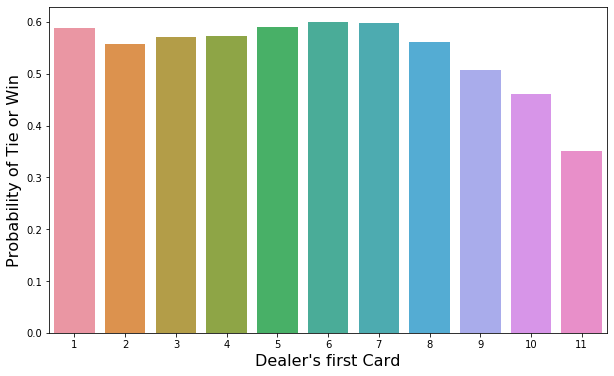

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
data = 1 - (df.groupby(by='dealcard1').sum()['lose'] /\
            df.groupby(by='dealcard1').count()['lose'])
fig, ax = plt.subplots(figsize=(10,6))

ax = sns.barplot(x=data.index, 
                 y=data.values)
ax.set_xlabel("Dealer's first Card",fontsize=16)
ax.set_ylabel("Probability of Tie or Win",fontsize=16)

Text(0, 0.5, 'Probability of Tie or Win')

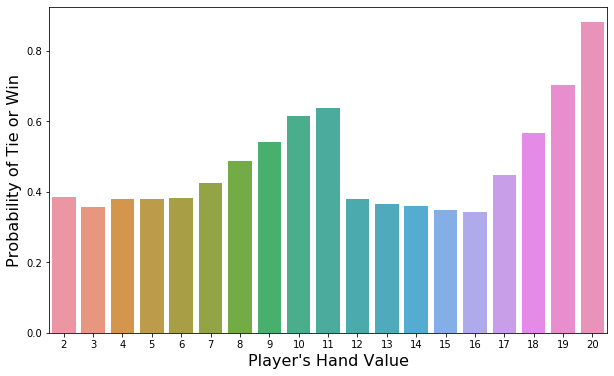

In [21]:
data = 1 - (df.groupby(by='player_total_initial').sum()['lose'] /\
            df.groupby(by='player_total_initial').count()['lose'])

fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=data[:-1].index,
                 y=data[:-1].values)
ax.set_xlabel("Player's Hand Value",fontsize=16)
ax.set_ylabel("Probability of Tie or Win",fontsize=16)

In [23]:
df.groupby(by='has_ace').sum()['lose'] / df.groupby(by='has_ace').count()['lose']

has_ace
0    0.509865
1    0.292180
Name: lose, dtype: float64

In [26]:
pivot_data = df[df['player_total_initial'] != 21]
pivot_data

,dealcard1,player_total_initial,hit,Y,has_ace,lose,correct_hit
0,10,17,0,-1,0,1,1
1,10,19,0,1,0,0,0
2,10,17,0,-1,0,1,1
3,10,12,1,-1,0,1,0
4,10,12,1,-1,0,1,0
...,...,...,...,...,...,...,...
899995,3,17,0,-1,0,1,1
899996,3,7,1,-1,1,1,0
899997,3,6,1,-1,0,1,0
899998,3,19,0,1,0,0,0


In [28]:
import numpy as np
losses_pivot = pd.pivot_table(pivot_data, values='lose', 
                              index=['dealcard1'],
                              columns = ['player_total_initial'],
                              aggfunc = np.sum)
losses_pivot

player_total_initial,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
dealcard1,,,,,,,,,,,,,,,,,,,
1,13,27,84,115,167,195,158,167,174,183,655,696,645,608,550,280,227,118,106
2,73,191,462,781,937,1182,896,971,1011,1067,3732,3957,3560,3381,2860,2117,1636,917,853
3,71,201,463,695,948,1142,904,974,1005,1040,3828,3668,3412,3226,2770,2085,1534,960,795
4,84,198,457,686,974,1141,895,990,1009,1065,3804,3659,3327,3084,2829,2082,1620,971,778
5,76,174,417,714,936,1121,830,917,939,1052,3812,3517,3330,2975,2677,1950,1563,884,794
6,77,193,444,700,866,1063,799,941,882,1030,3565,3586,3172,2842,2572,1749,1421,825,668
7,60,167,453,732,980,971,799,845,918,984,3597,3588,3479,3231,3105,1524,1047,641,560
8,60,199,471,730,983,1251,955,952,983,1129,3770,3830,3620,3388,3167,2478,1155,499,509
9,80,210,484,894,1161,1298,1128,1079,1136,1211,4139,3906,3828,3626,3331,2705,2458,775,480


In [30]:
games_pivot =  pd.pivot_table(pivot_data, values='lose', 
                              index=['dealcard1'],
                              columns = ['player_total_initial'],
                              aggfunc = 'count')
games_pivot

player_total_initial,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
dealcard1,,,,,,,,,,,,,,,,,,,
1,20,51,159,223,301,388,358,434,523,637,1198,1152,1081,966,839,781,801,703,1346
2,118,300,791,1309,1671,2193,2014,2454,2909,3270,6385,6284,5764,5413,4771,4415,4473,4011,7346
3,126,327,776,1246,1699,2268,1984,2414,2901,3263,6542,6110,5719,5402,4732,4457,4609,4187,7270
4,140,314,825,1232,1736,2206,2032,2444,2889,3290,6364,6187,5693,5290,4917,4418,4559,4199,7274
5,126,323,791,1333,1731,2265,2015,2482,2902,3400,6532,6215,5964,5292,4815,4353,4621,4092,7357
6,131,334,786,1299,1674,2221,1924,2475,2747,3351,6253,6163,5689,5167,4650,4336,4528,4054,7288
7,126,300,773,1251,1786,2141,2045,2335,2916,3147,6434,6130,5742,5213,4841,4276,4469,4189,7279
8,105,324,779,1221,1615,2176,2100,2422,2838,3309,6419,6323,5717,5323,4732,4208,4355,4060,7400
9,135,305,764,1329,1739,2114,2050,2472,2867,3259,6483,6036,5798,5306,4812,4273,4482,3949,7397


In [31]:
heat_data = 1 - losses_pivot.sort_index(ascending=False) / games_pivot.sort_index(ascending=False)
heat_data

player_total_initial,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
dealcard1,,,,,,,,,,,,,,,,,,,
11,0.239130,0.237500,0.232593,0.250460,0.234659,0.239978,0.282521,0.347053,0.421752,0.510079,0.252085,0.240613,0.248528,0.221846,0.215203,0.200168,0.313266,0.457101,0.584292
10,0.333333,0.297648,0.324068,0.318288,0.314207,0.349950,0.396562,0.453127,0.565502,0.587476,0.336173,0.324829,0.306020,0.288988,0.274568,0.346519,0.436999,0.548855,0.888874
9,0.407407,0.311475,0.366492,0.327314,0.332375,0.385998,0.449756,0.563511,0.603767,0.628414,0.361561,0.352883,0.339772,0.316623,0.307772,0.366955,0.451584,0.803748,0.935109
8,0.428571,0.385802,0.395379,0.402129,0.391331,0.425092,0.545238,0.606936,0.653629,0.658809,0.412681,0.394275,0.366801,0.363517,0.330727,0.411122,0.734788,0.877094,0.931216
7,0.523810,0.443333,0.413972,0.414868,0.451288,0.546474,0.609291,0.638116,0.685185,0.687321,0.440939,0.414682,0.394114,0.380203,0.358604,0.643592,0.765719,0.846980,0.923066
6,0.412214,0.422156,0.435115,0.461124,0.482676,0.521387,0.584719,0.619798,0.678922,0.692629,0.429874,0.418141,0.442433,0.449971,0.446882,0.596633,0.686175,0.796497,0.908342
5,0.396825,0.461300,0.472819,0.464366,0.459272,0.505077,0.588089,0.630540,0.676430,0.690588,0.416412,0.434111,0.441650,0.437831,0.444029,0.552033,0.661762,0.783969,0.892076
4,0.400000,0.369427,0.446061,0.443182,0.438940,0.482774,0.559547,0.594926,0.650744,0.676292,0.402263,0.408599,0.415598,0.417013,0.424649,0.528746,0.644659,0.768754,0.893044
3,0.436508,0.385321,0.403351,0.442215,0.442025,0.496473,0.544355,0.596520,0.653568,0.681275,0.414858,0.399673,0.403392,0.402814,0.414624,0.532197,0.667173,0.770719,0.890646


Text(123.0, 0.5, "Dealer's Card")

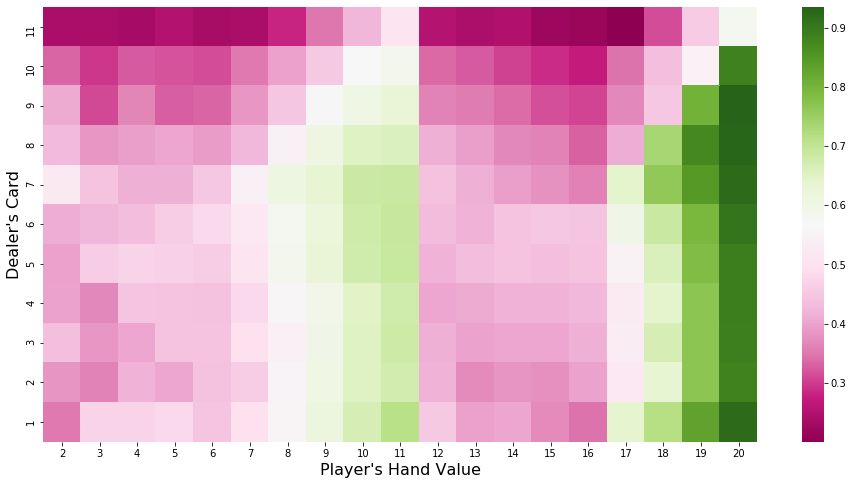

In [32]:
fig, ax = plt.subplots(figsize=(16,8))
sns.heatmap(heat_data, square=False, cmap="PiYG");

ax.set_xlabel("Player's Hand Value",fontsize=16)
ax.set_ylabel("Dealer's Card",fontsize=16)